# Project description

You’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and your partners decide to try to attract investors. They’re interested in the current market conditions—will you be able to maintain your success when the novelty of robot waiters wears off?

You’re an analytics guru, so your partners have asked you to prepare some market research. You have open-source data on restaurants in LA.

#### Step - Download the data and prepare it for analysis
Download the data on restaurants in LA. 
Make sure that the data type for each column is correct and that there are no missing values or duplicates. 
Process them if necessary.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sb
import seaborn as sns
!pip install usaddress
import usaddress

In [2]:
try: 
    data = pd.read_csv('/datasets/rest_data_us.csv')
except:
    data = pd.read_csv('rest_data_us.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
data['object_type'] = data['object_type'].astype('category')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 386.8+ KB


In [6]:
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()
data.head()

,id,object_name,address,chain,object_type,number
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26
1,11787,reilly's,100 world way # 120,False,Restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22
4,11790,pollen,2100 echo park ave,False,Restaurant,20


In [7]:
data_duplicated = data[data.duplicated()]

In [8]:
# checking to see if there are restaurants with more than one location 

various_establishments = data[data['object_name'].duplicated()]
various_establishments

,id,object_name,address,chain,object_type,number
128,11914,admirals club,500 world way,False,Restaurant,205
309,12095,the veggie grill,6374 w sunset blvd ste #a,True,Restaurant,69
349,12135,waba grill,5527 hollywood blvd,True,Restaurant,111
380,12166,donut star,11079 w pico blvd,True,Fast Food,27
388,12174,trimana,3550 wilshire blvd ste #116,True,Restaurant,33
...,...,...,...,...,...,...
9605,21391,yamakase,11901 santa monica blvd # 111,True,Restaurant,22
9608,21394,go get em tiger,230 n larchmont blvd,True,Restaurant,5
9627,21413,pizza buona,922 n alavarado st ste c,True,Pizza,5
9639,21425,mcdonald's,1800 s western ave,True,Fast Food,135


In [9]:
data[data['object_name']=='trimana']

,id,object_name,address,chain,object_type,number
375,12161,trimana,9841 airport blvd,True,Restaurant,19
388,12174,trimana,3550 wilshire blvd ste #116,True,Restaurant,33
1761,13547,trimana,1200 w 7th st ste #125,True,Restaurant,138
2510,14296,trimana,3415 s sepulveda blvd # 160,True,Restaurant,24
2736,14522,trimana,700 exposition park dr,True,Restaurant,33
4868,16654,trimana,12100 wilshire blvd m30,True,Restaurant,5
5157,16943,trimana,1900 avenue of the stars ste a100,True,Restaurant,36
5705,17491,trimana,6500 wilshire blvd # 130,True,Restaurant,43
6347,18133,trimana,1875 century park e ste a,True,Restaurant,119
6853,18639,trimana,633 w 5th st # 150,True,Restaurant,7


In [10]:
data[data['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,taqueria los 3 carnales,5000 e whittier blvd,NaN,Restaurant,14
7523,19309,jammin jimmy's pizza,1641 firestone blvd,NaN,Pizza,1
8648,20434,the lexington theater,129 e 3rd st,NaN,Restaurant,35


In [11]:
# checking if there are other restaurants with same name to see if I can replace missing values in 'chain'

data[data['object_name']=='taqueria los 3 carnales']

,id,object_name,address,chain,object_type,number
7408,19194,taqueria los 3 carnales,5000 e whittier blvd,NaN,Restaurant,14


In [12]:
# checking if there are other restaurants with same name to see if I can replace missing values in 'chain'

data[data['object_name']=='jammin jimmy\'s pizza']

,id,object_name,address,chain,object_type,number
7523,19309,jammin jimmy's pizza,1641 firestone blvd,NaN,Pizza,1


In [13]:
# checking if there are other restaurants with same name to see if I can replace missing values in 'chain'

data[data['object_name']=='the lexington theater']

,id,object_name,address,chain,object_type,number
8648,20434,the lexington theater,129 e 3rd st,NaN,Restaurant,35


In [14]:
# Since there are only 3 restaurants with chain type missing 
# and I didn't find other restaurants with same name to fill missing values, I will drop those rows for better analysis

data = data.dropna(subset=['chain'])

In [15]:
data['chain'].value_counts() 

False    5972
True     3676
Name: chain, dtype: int64

In [16]:
data['object_type'].value_counts() 

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: object_type, dtype: int64

#### Step 2. Data analysis
- Investigate the proportions of the various types of establishments. Plot a graph.
- Investigate the proportions of chain and nonchain establishments. Plot a graph.
- Which type of establishment is typically a chain?
- What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
- Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
- Put the data on street names from the address column in a separate column.
- Plot a graph of the top ten streets by number of restaurants.
- Find the number of streets that only have one restaurant.
- For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

##### Investigate the proportions of the various types of establishments. Plot a graph.

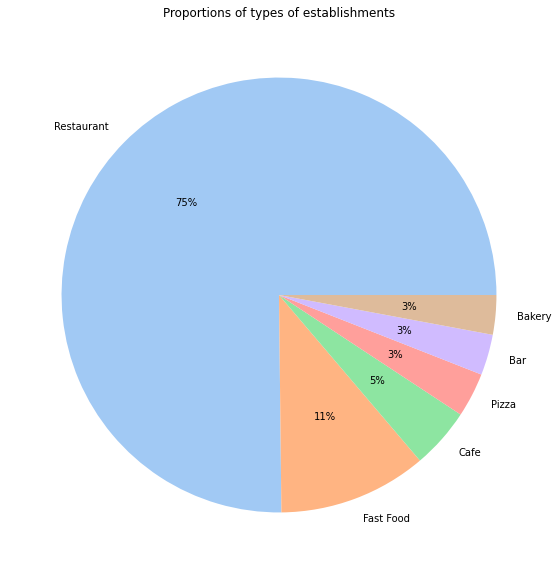

In [17]:
restaurant_type = data['object_type'].value_counts().reset_index()

labels = restaurant_type['index']
values = restaurant_type['object_type']

colors = sns.color_palette('pastel')[0:7]
plt.figure(figsize=(15,10))
plt.title('Proportions of types of establishments')
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

- About 3/4 of restaurant types in LA are restaurant, while the rest of the restaurant types altogether make up for 1/4 of the market share
- Pizza, bars and bakeries are the smallest percentage of restaurant types

##### Investigate the proportions of chain and nonchain establishments. Plot a graph.

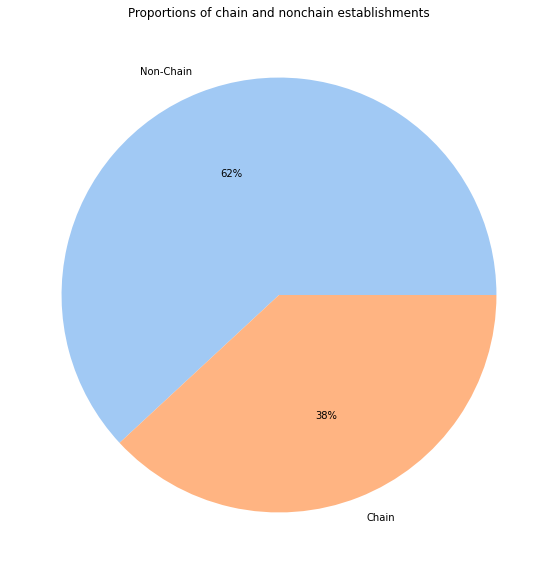

In [18]:
chain = data['chain'].value_counts().reset_index()
chain.columns = ['type', 'total']

chain_pie = ['Non-Chain', 'Chain']
chain_values = chain['total']

colors = sns.color_palette('pastel')[0:7]
plt.figure(figsize=(15,10))
plt.title('Proportions of chain and nonchain establishments')
plt.pie(chain_values, labels = chain_pie, colors = colors, autopct='%.0f%%')
plt.show()

Approximately 2/3 of restaurants in LA are non-chain restaurants, while only about 1/3 are part of a chain

##### Which type of establishment is typically a chain?

In [19]:
is_chain = data[data['chain']==True].drop(['id', 'object_name', 'address', 'chain'], axis=1).reset_index()
is_chain = is_chain.groupby('object_type', as_index=False).agg({'number': 'count'}).sort_values(by='number', ascending=False)
is_chain.columns = ['object_type', 'chain']
is_chain

,object_type,chain
5,Restaurant,2292
3,Fast Food,605
0,Bakery,283
2,Cafe,266
4,Pizza,153
1,Bar,77


In [20]:
isnot_chain = data[data['chain']==False].drop(['id', 'object_name', 'address', 'chain'], axis=1).reset_index()
isnot_chain = isnot_chain.groupby('object_type', as_index=False).agg({'number': 'count'}).sort_values(by='number', ascending=False)
isnot_chain.columns = ['object_type', 'non_chain']
isnot_chain

,object_type,non_chain
5,Restaurant,4961
3,Fast Food,461
1,Bar,215
2,Cafe,169
4,Pizza,166
0,Bakery,0


In [21]:
chain_proportions = is_chain.merge(isnot_chain, on='object_type', how='outer')
chain_proportions.loc[chain_proportions['non_chain'].isna(), 'non_chain']=0
chain_proportions['non_chain'] = chain_proportions['non_chain'].astype('int')
chain_proportions.index = chain_proportions['object_type']

<AxesSubplot:title={'center':'Distribution of chain/non-chain by type of establishments'}, xlabel='object_type'>

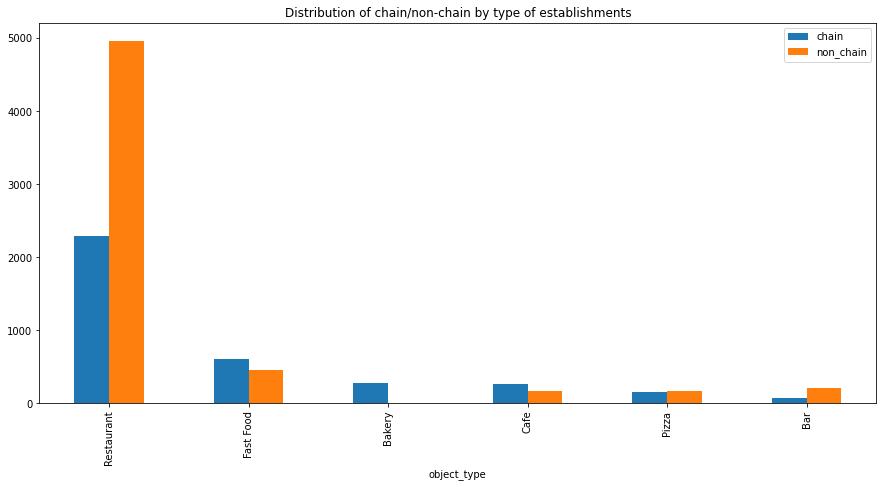

In [22]:
chain_proportions.plot(y=['chain', 'non_chain'], kind='bar', figsize=(15,7), title='Distribution of chain/non-chain by type of establishments')



- Restaurants: the majority are non-chains
- **Fast Food: the majority are chains, although the difference is not huge**
- **Bakeries are always part of a chain**
- **Cafes: the majority are chains, although the difference is not huge**
- For Pizza, the proportions of chains/non-chains are almost equal
- Bars: more often non-chains 

##### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [23]:
chain_seats = data.loc[data['chain']==True]
pd.options.mode.chained_assignment = None
chain_seats

,id,object_name,address,chain,object_type,number
8,11794,abc donuts,3027 n san fernando rd unit 103,True,Fast Food,1
10,11796,el pollo loco,5319 w sunset blvd,True,Restaurant,38
11,11797,poong nyun bakery,928 s western ave ste 109,True,Bakery,17
12,11798,emc restaurant group llc,3500 w 6th st ste 101,True,Restaurant,133
14,11800,cuscatleca bakery,2501 w sunset blvd #a,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,jucuapa bakery,2810 james wood blvd,True,Bakery,10
9636,21422,chipotle #3094,6719 la tijera blvd # a-b,True,Restaurant,47
9639,21425,mcdonald's,1800 s western ave,True,Fast Food,135
9648,21434,juicy wingz,6741 hollywood blvd,True,Fast Food,15


In [24]:
def seat_categories(seats):
    if seats<50:
        return ('1-50')
    if seats<100:
        return ('51-100')
    if seats<150:
        return ('101-150')
    if seats<200:
        return ('151-200')
    else:
        return ('201-230')

chain_seats['seats_group'] = chain_seats['number'].apply(seat_categories) 
seats_per_establishment = chain_seats['seats_group'].value_counts().reset_index()
seats_per_establishment.columns = ['seats', 'count']
seats_per_establishment

,seats,count
0,1-50,3033
1,101-150,284
2,51-100,226
3,151-200,87
4,201-230,46


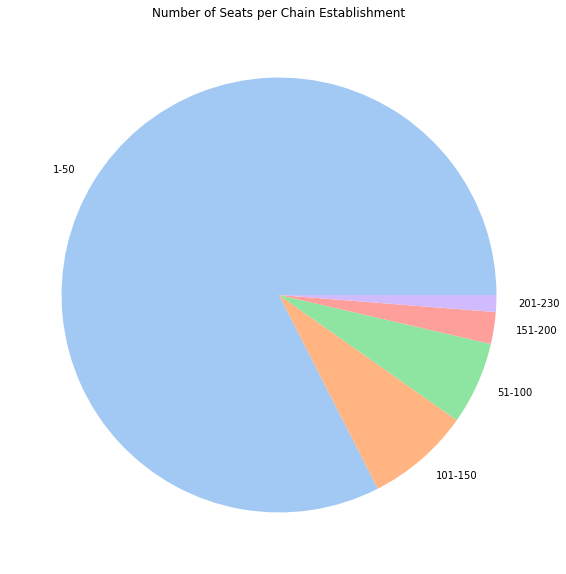

In [25]:
seats_per_establishment_pie = seats_per_establishment['seats']
seats_per_establishment_values = seats_per_establishment['count']

colors = sns.color_palette('pastel')[0:7]
plt.figure(figsize=(15,10))
plt.title('Number of Seats per Chain Establishment')
plt.pie(seats_per_establishment_values, labels = seats_per_establishment_pie, colors = colors)

plt.show()

<AxesSubplot:title={'center':'Number of Seats per Type of Establishment'}, xlabel='id', ylabel='number'>

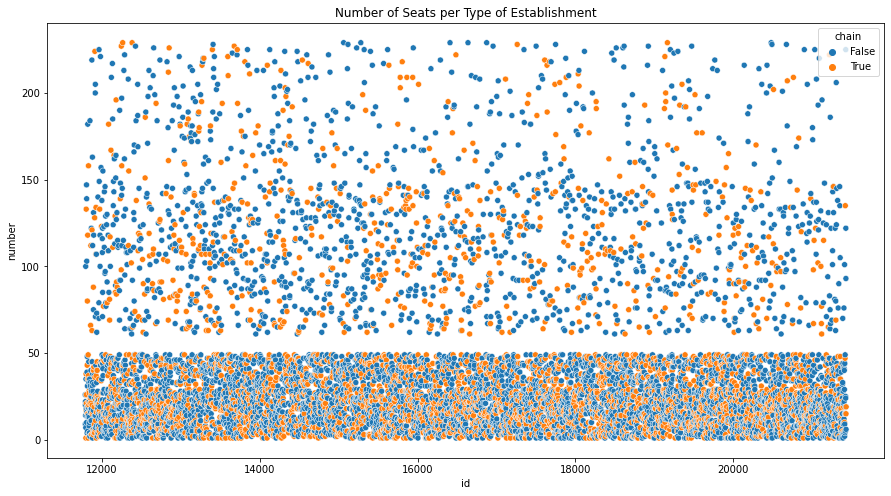

In [26]:
plt.figure(figsize=(15,8))
plt.title('Number of Seats per Type of Establishment')
sb.scatterplot(data=data, x="id",  y="number", hue='chain')

Both in chains and non-chain establishments a small number of seats: 75% of them have 1-50 number of seats, and a smaller percentage with more than 50 seats

##### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [27]:
def ave_seats(obj_type):
    average_seats = data[data['object_type']==(obj_type)]['number'].mean().round()
    print('Average number of seats for {}: {}'.format(obj_type, average_seats))
    

In [28]:
ave_seats('Restaurant')

Average number of seats for Restaurant: 48.0


In [29]:
ave_seats('Fast Food')

Average number of seats for Fast Food: 32.0


In [30]:
ave_seats('Bakery')

Average number of seats for Bakery: 22.0


In [31]:
ave_seats('Cafe')

Average number of seats for Cafe: 25.0


In [32]:
ave_seats('Pizza')

Average number of seats for Pizza: 29.0


In [33]:
ave_seats('Bar')

Average number of seats for Bar: 45.0


In [34]:
avg_seats = {'type': ['Restaurant', 'Fast Food', 'Bakery', 'Cafe', 'Pizza', 'Bar'], 'avg_seats': [48, 32, 22, 25, 29, 45]}
avg_seats = pd.DataFrame(avg_seats)
avg_seats = avg_seats.sort_values(by='avg_seats', ascending=False)

<AxesSubplot:title={'center':'Average number of seats per establishment'}, xlabel='type'>

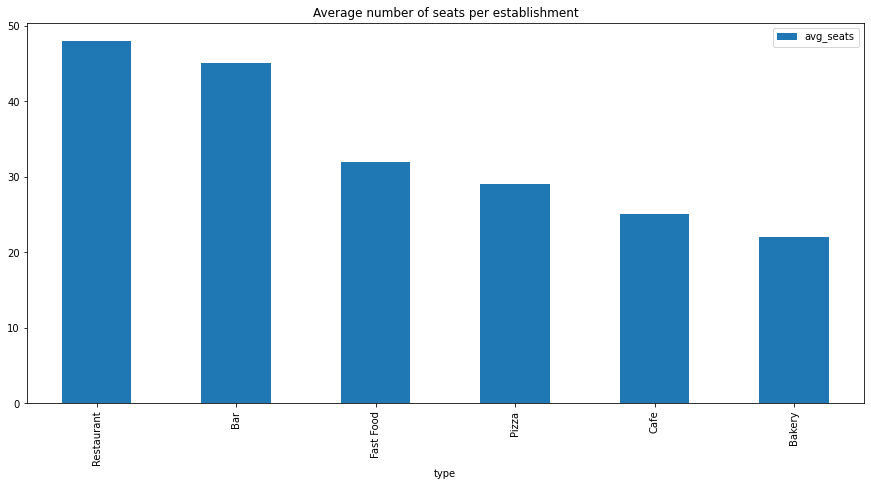

In [35]:
avg_seats.index = avg_seats['type']
avg_seats.plot(y='avg_seats', kind='bar', figsize=(15,7), title='Average number of seats per establishment')


In [36]:
print(np.percentile(data['number'], [90, 95, 99]))

[120. 148. 214.]


In [37]:
data['number'].mean().round()

44.0

- The 'Restaurant' type have the greatest average seats: 48 per restaurant
- The average number of seats for all establishments is 44
- Not more than 10% of  have more than 120 seats
- Not more than 5% of restaurants have more than 148 seats
- Not more than 1% of restaurants have more than 214 seats


##### Put the data on street names from the address column in a separate column.

In [38]:
data['address'] = data['address'].astype('str')

In [39]:
address = usaddress.parse(data.iloc[6]['address'])
address

[('100', 'AddressNumber'),
 ('world', 'StreetName'),
 ('way', 'StreetNamePostType'),
 ('#', 'OccupancyIdentifier'),
 ('126', 'OccupancyIdentifier')]

In [40]:
dict_address={}
for i in address:
    dict_address.update({i[1]:i[0]})

In [41]:
dict_address

{'AddressNumber': '100',
 'StreetName': 'world',
 'StreetNamePostType': 'way',
 'OccupancyIdentifier': '126'}

In [42]:
dict_address={}
def street(address):
    raw_address=usaddress.parse(address)
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    street=dict_address['StreetName']
    return street

In [43]:
data['street'] = data['address'].apply(street)
data.head()

,id,object_name,address,chain,object_type,number,street
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,Cafe,26,rock
1,11787,reilly's,100 world way # 120,False,Restaurant,9,world
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20,hollywood
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22,sunset
4,11790,pollen,2100 echo park ave,False,Restaurant,20,park


In [44]:
# olvera is a problematic street since our function didn't name streets correctly 

data[data['address'].str.contains('olvera')]

,id,object_name,address,chain,object_type,number,street
1888,13674,magdaleno debbie,olvera st e17,False,Restaurant,15,sawtlle
2533,14319,el paseo inn,11 e olvera st,False,Restaurant,91,olvera
3719,15505,las anitas,olvera st 26,False,Restaurant,38,cienega
7281,19067,cielito lindo,olvera st 23,False,Restaurant,2,sunset
7319,19105,juanita's cafe,olvera st 20,False,Restaurant,12,mlk
7321,19107,kitty's snow cones,olvera st 2,False,Restaurant,11,imperial
7327,19113,la noche buena,olvera st e8,False,Restaurant,1,olvera
7438,19224,la golondrina,olvera st w17,False,Restaurant,204,pico
7741,19527,rodolfo's restaurant,olvera st 5,True,Restaurant,4,6th


In [45]:
#fixing problematic street 'olvera'

data.loc[data['address'].str.contains('olvera'),'street'] = 'olvera'
data[data['address'].str.contains('olvera')]

,id,object_name,address,chain,object_type,number,street
1888,13674,magdaleno debbie,olvera st e17,False,Restaurant,15,olvera
2533,14319,el paseo inn,11 e olvera st,False,Restaurant,91,olvera
3719,15505,las anitas,olvera st 26,False,Restaurant,38,olvera
7281,19067,cielito lindo,olvera st 23,False,Restaurant,2,olvera
7319,19105,juanita's cafe,olvera st 20,False,Restaurant,12,olvera
7321,19107,kitty's snow cones,olvera st 2,False,Restaurant,11,olvera
7327,19113,la noche buena,olvera st e8,False,Restaurant,1,olvera
7438,19224,la golondrina,olvera st w17,False,Restaurant,204,olvera
7741,19527,rodolfo's restaurant,olvera st 5,True,Restaurant,4,olvera


In [46]:
# los angeles is also a problematic street since our function didn't name 1 street correctly (row 7003)

data[data['address'].str.contains('los angeles')]

,id,object_name,address,chain,object_type,number,street
252,12038,tamarind of l.a.,934 s los angeles st # 9,False,Restaurant,11,angeles
710,12496,nayeb restaurant,1300 s los angeles st ste #d,True,Restaurant,14,angeles
1174,12960,tommy's cafe,1610 s los angeles st,False,Restaurant,25,angeles
1175,12961,brunch,720 s los angeles st # b,False,Restaurant,6,angeles
1714,13500,bronzed aussie,714 s los angeles st ste a,False,Restaurant,19,angeles
1771,13557,"guero's cocina mexicana, inc.",737 s los angeles st,False,Restaurant,45,angeles
1791,13577,downtown kabob,934 s los angeles st ste #6,False,Restaurant,15,angeles
1858,13644,restaurante guerrero,1201 s los angeles st # 7,True,Restaurant,39,angeles
2983,14769,sunday cafe,396 s los angeles st ste #26,False,Restaurant,2,angeles
3958,15744,cilantro lime,934 s los angeles st #2,False,Restaurant,12,angeles


In [47]:
#fixing problematic street 'los angeles'

data.loc[data['address'].str.contains('los angeles'),'street'] = 'los angeles'

##### Plot a graph of the top ten streets by number of restaurants.

In [48]:
#grouping by street name and getting number of restaurants per street

top_streets = data.groupby('street')['id'].nunique().reset_index().sort_values(by='id', ascending=False)
top_streets = top_streets.head(10)
top_streets.columns = ['street', 'restaurants_number']
top_streets

,street,restaurants_number
386,sunset,405
437,wilshire,398
334,pico,371
429,western,369
173,figueroa,334
318,olympic,309
407,vermont,288
295,monica,264
22,3rd,262
220,hollywood,254


<AxesSubplot:title={'center':'Top 10 streets by number of restaurants'}, xlabel='street'>

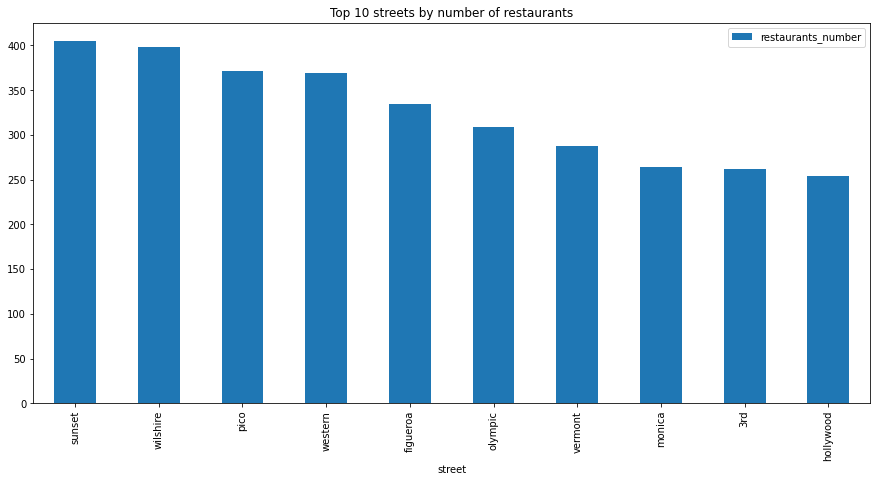

In [49]:
top_streets.index = top_streets['street']
top_streets.plot(y='restaurants_number', kind='bar', figsize=(15,7), title='Top 10 streets by number of restaurants')


##### Find the number of streets that only have one restaurant.

In [50]:
bottom_streets = data.groupby(['street'])['id'].nunique().reset_index().sort_values(by='id', ascending=False)
bottom_streets = bottom_streets[bottom_streets['id']==1]
bottom_streets

,street,id
322,overhill,1
405,ventura,1
317,olympc,1
327,palisades,1
380,stanford,1
...,...,...
227,idell,1
231,inglewood,1
234,japanese,1
235,jarvis,1


There are 177 streets that have only 1 restaurant in them

##### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [51]:
print(np.percentile(data['number'], [90, 95, 99]))

[120. 148. 214.]


In [52]:
# We will define streets with 'a lot of restaurants' as those that have more than 120 restaurants in them
# (which is about 10% of all establishments)

high_streets = data.groupby('street')['id'].nunique().reset_index().sort_values(by='id', ascending=False)
high_streets.columns = ['street', 'restaurants']
high_streets = high_streets[high_streets['restaurants']>120]
high_streets

,street,restaurants
386,sunset,405
437,wilshire,398
334,pico,371
429,western,369
173,figueroa,334
318,olympic,309
407,vermont,288
295,monica,264
22,3rd,262
220,hollywood,254


In [53]:
data_high_streets = data[data['street'].isin(high_streets['street'])] 
data_high_streets

,id,object_name,address,chain,object_type,number,street
1,11787,reilly's,100 world way # 120,False,Restaurant,9,world
2,11788,street churros,6801 hollywood blvd # 253,False,Fast Food,20,hollywood
3,11789,triniti echo park,1814 w sunset blvd,False,Restaurant,22,sunset
6,11792,cpk,100 world way # 126,False,Restaurant,100,world
7,11793,pho lala,3500 w 6th st ste 226,False,Restaurant,7,6th
...,...,...,...,...,...,...,...
9642,21428,tolosa,2635 whittier blvd,False,Restaurant,19,whittier
9644,21430,la bufadora bar,3470 e 1st st,False,Bar,24,1st
9645,21431,saint marc,10250 santa monica blvd # 1025,False,Restaurant,225,monica
9647,21433,fin-melrose,5750 melrose ave,False,Restaurant,93,melrose


[Text(0.5, 1.0, 'Number of Seats in Popular Streets')]

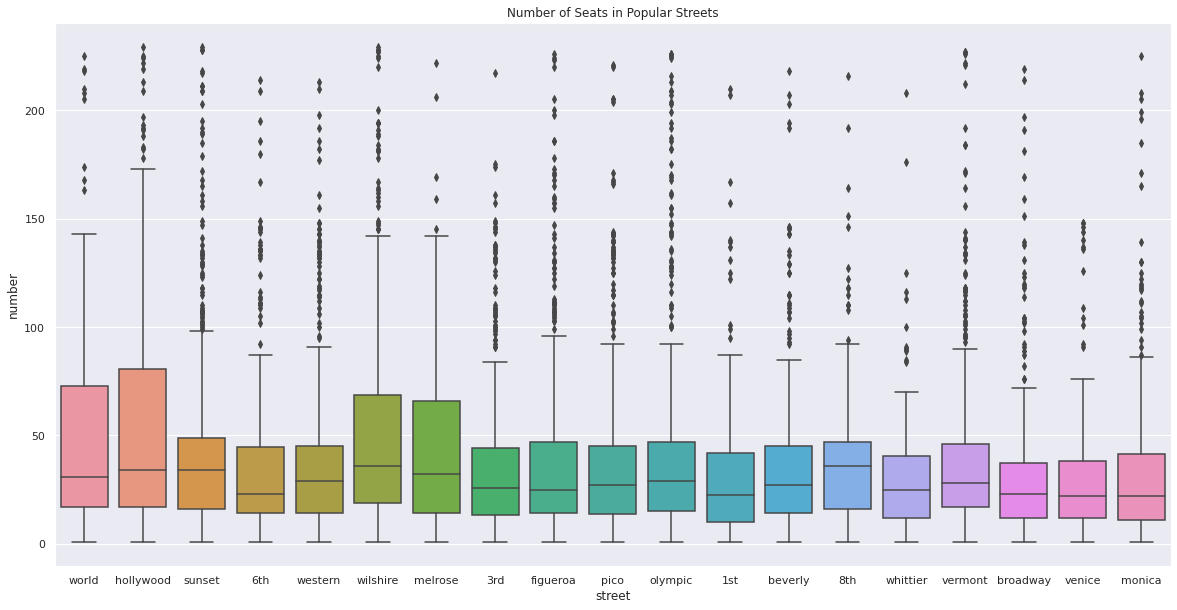

In [54]:
sb.set(rc={'figure.figsize':(20,10)})
sb.boxplot(x='street',y='number',data=data_high_streets).set(title='Number of Seats in Popular Streets')



In [55]:
# Checking seats number trends in all restaurants situated in streets with lot of restaurants in them

seats_in_high_streets = data[data['street'].isin(high_streets['street'])==True]
seats_in_high_streets['number'].describe()

count    4698.000000
mean       43.945934
std        46.520645
min         1.000000
25%        14.000000
50%        28.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

In [56]:
# Checking trends for seats number in Cafes situated in streets with lot of restaurants in them

seats_in_high_streets[seats_in_high_streets['object_type']=='Cafe']['number'].describe()

count    215.000000
mean      23.581395
std       17.677580
min        1.000000
25%       11.000000
50%       21.000000
75%       32.500000
max      143.000000
Name: number, dtype: float64

In [57]:
# low streets are those streets that have only 1 restaurant in them

low_streets = pd.Series(bottom_streets['street'])
low_streets

322     overhill
405      ventura
317       olympc
327    palisades
380     stanford
         ...    
227        idell
231    inglewood
234     japanese
235       jarvis
450          zoo
Name: street, Length: 177, dtype: object

In [58]:
# Checking trends for seats number in all restaurants situated in streets with few restaurants 

seats_in_low_streets = data[data['street'].isin(low_streets)==True]
seats_in_low_streets['number'].describe()

count    177.000000
mean      58.271186
std       59.565519
min        2.000000
25%       18.000000
50%       31.000000
75%       91.000000
max      229.000000
Name: number, dtype: float64

In [59]:
# Checking trends for seats number in Cafes situated in streets with few restaurants 

seats_in_low_streets[seats_in_low_streets['object_type']=='Cafe']['number'].describe()

count     3.000000
mean     17.000000
std      11.135529
min       5.000000
25%      12.000000
50%      19.000000
75%      23.000000
max      27.000000
Name: number, dtype: float64

- Streets with a high number of restaurants in them have an average of 43 seats, while streets with a low number of restaurants have an average of 58 seats 
    - Could be because these busier streets are more crowded and have less space to have bigger restaurants
    - Could be because restaurants in busier streets are more fancy and have less seats in them
    - Could be that because in the less busy streets there are less options, so restaurants get busier there, and therefore they must have lots of seats to host many visitors
    
    
- **For Cafes:**
- There are almost no cafes in streets with few restaurants in them
- Cafes in busy streets have an average of 23 seats, while Cafes in less busy streets have an average of 17 seats

##### Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

- Cafes take only 4.51% of the entire market share of restaurants, which means the market is not saturated
- Busy streets have Cafes with more seats, while Cafes in less crowded streets have a smaller number of seats
- The average number of seats in Cafes in non-crowded streets is 17, while Cafes in busier streets have an average of 25 seats
- The majority of cafes are part of a chain, although the difference between chains and non-chains is not huge

###### Recommendations for opening small robot-run cafe in Los Angeles:
- Open a Cafe in a busy street (more than 150 restaurants in the street) to ensure visibility
- Being part of a chain is not an important factor as the cafes are divided almost equally between chain/non-chains
- Have around 23 seats to be in line with busy streets' trends, and to have enough room to seat all visitors




Presentation: <https://docs.google.com/presentation/d/1_-Tz0Jc54qoruVzNpjMhM5t4ISZ81JPOrsZI9hpHB00/edit?usp=sharing> 